# **Hotel Booking Cancelations Prediction**

---------------------
## **Context**
---------------------

It is important for hotels to build a model that predicts whether a reservation will be canceled because it allows them to optimize their operations and revenue. By identifying potential cancellations, hotels can take proactive measures such as overbooking or offering special deals to entice guests to keep their reservations. This helps to maximize occupancy rates and minimize revenue losses. Additionally, accurate predictions of cancellations can inform staffing decisions and help to reduce wastage in areas such as food and housekeeping. Overall, having a reliable cancellation prediction model can lead to improved efficiency and profitability for hotels.

----------------------
## **Objective**  
----------------------

* To identify the different factors that predict booking cancelation.
* To build a model to predict if a booking will be canceled or not.

------------------------------------
## **Dataset Description**
------------------------------------

Hotel booking dataset with 19 variables. It comprehends three full years of customer behavioral data. In addition to personal and behavioral information, the dataset also contains demographic and geographical information. The data set was obtained (and modified) from: https://data.mendeley.com/datasets/j83f5fsh6c/1


* **hotel:** One of "Resort Hotel" or "City Hotel"
* **reservation_lead_time:** Number of days the reservation was placed in advance of the scheduled arrival
* **Date:** Date of scheduled arrival as MM/DD/YYYY
* **arrival_date_month:** Month of arrival date
* **Day_of_week:** Day of week of arrival date (1) for sunday, (2) for monday...
* **stays_in_days:** Total number of booked nights
* **stays_in_weekend_nights:** Number of booked nights that are weekend nights
* **stays_in_week_nights:** Number of booked nights that are weekday nights*
* **adults:** Number of adults included in the booking*
* **children:** Number of children and babies included in the booking*
* **Nationality:** Nationality of guest (DEU = Germany, ESP = Spain, FRA = France, ITA = Italy, PRT = Portugal, USA = US, Other)*
* **booking_origin:** Indicates channel through which the booking was made
* **is_repeated_guest:** Indicator variable for whether the guest has booked at the hotel previously (1=previously)
* **previous_cancellations:** Count of previous cancelations by the guest
* **previous_bookings_not_canceled:** Count of previous bookings not canceled by the guest
* **reserved_room_type:** Count of previous bookings not canceled by the guest
* **adr:** Average daily rate of the booking (in Euros)
* **is_canceled:** Indicator variable for whether the booking was canceled (1=canceled)
* **cancel_lead_time:** For canceled bookings, days in advance the booking was canceled. Takes value zero (0) for uncanceled bookings.


## **Importing the required libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the dataset**

In [2]:
# Reading the dataset
df = pd.read_excel('Bookings-sample.xlsx')

In [3]:
df.head()

,hotel,reservation_lead_time,Date,arrival_date_month,Day_of_week,stays_in_days,stays_in_weekend_nights,stays_in_week_nights,adults,children,Nationality,booking_origin,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,adr,is_canceled,cancel_lead_time
0,Resort Hotel,737,2015-07-01,July,4,0,0,0,2,0,PRT,Direct,0,0,0,C,0.0,0,0
1,Resort Hotel,13,2015-07-01,July,4,1,0,1,1,0,GBR,Corporate,0,0,0,A,75.0,0,0
2,Resort Hotel,14,2015-07-01,July,4,2,0,2,2,0,GBR,Online TA,0,0,0,A,98.0,0,0
3,Resort Hotel,75,2015-07-01,July,4,3,0,3,2,0,PRT,Offline TA/TO,0,0,0,D,105.5,1,70
4,Resort Hotel,23,2015-07-01,July,4,4,0,4,2,0,PRT,Online TA,0,0,0,E,123.0,1,8


### **Checking the info of the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29846 entries, 0 to 29845
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           29846 non-null  object        
 1   reservation_lead_time           29846 non-null  int64         
 2   Date                            29846 non-null  datetime64[ns]
 3   arrival_date_month              29846 non-null  object        
 4   Day_of_week                     29846 non-null  int64         
 5   stays_in_days                   29846 non-null  int64         
 6   stays_in_weekend_nights         29846 non-null  int64         
 7   stays_in_week_nights            29846 non-null  int64         
 8   adults                          29846 non-null  int64         
 9   children                        29846 non-null  int64         
 10  Nationality                     29846 non-null  object        
 11  bo

**Observations:**

- There are **29846 observations and 19 columns** in the data.
- All the column have 29846 non-null values, i.e., there are **no missing values** in the data.

**Let's check the number of unique values in each column.** 

In [5]:
# Checking the number of unique values in each column
df.nunique()

hotel                                2
reservation_lead_time              468
Date                               793
arrival_date_month                  12
Day_of_week                          7
stays_in_days                       36
stays_in_weekend_nights             14
stays_in_week_nights                29
adults                               8
children                             4
Nationality                          8
booking_origin                       7
is_repeated_guest                    2
previous_cancellations              14
previous_bookings_not_canceled      40
reserved_room_type                   8
adr                               4219
is_canceled                          2
cancel_lead_time                   370
dtype: int64

**Observations:**

- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.
- As we have the month and the day of the week of the reservation, we dont need the Date



In [6]:
# Dropping the columns 
df = df.drop(['Date'], axis = 1)

In [7]:
df.keys()

Index(['hotel', 'reservation_lead_time', 'arrival_date_month', 'Day_of_week',
       'stays_in_days', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'Nationality', 'booking_origin',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'adr',
       'is_canceled', 'cancel_lead_time'],
      dtype='object')

In [8]:
# Creating numerical columns
num_cols = ['reservation_lead_time', 'stays_in_days', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'previous_cancellations',
       'previous_bookings_not_canceled', 'adr', 'cancel_lead_time']

# Creating categorical variables 
cat_cols = ['hotel', 'arrival_date_month', 'Day_of_week',
       'Nationality', 'booking_origin',
       'is_repeated_guest', 'reserved_room_type',
       'is_canceled']




## Exploratory Data Analysis

### **Univariate analysis of numerical columns**

In [9]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
reservation_lead_time,29846.0,104.037794,106.892122,0.0,17.000,69.0,161.0,737.0
stays_in_days,29846.0,3.423909,2.569292,0.0,2.000,3.0,4.0,48.0
stays_in_weekend_nights,29846.0,0.925920,0.999802,0.0,0.000,1.0,2.0,14.0
stays_in_week_nights,29846.0,2.497990,1.917247,0.0,1.000,2.0,3.0,34.0
adults,29846.0,1.851538,0.512506,0.0,2.000,2.0,2.0,26.0
children,29846.0,0.100885,0.392134,0.0,0.000,0.0,0.0,3.0
previous_cancellations,29846.0,0.086678,0.843744,0.0,0.000,0.0,0.0,26.0
previous_bookings_not_canceled,29846.0,0.141292,1.558736,0.0,0.000,0.0,0.0,71.0
adr,29846.0,101.614885,48.075604,0.0,69.065,94.5,126.0,510.0
cancel_lead_time,29846.0,31.410440,68.955142,0.0,0.000,0.0,25.0,526.0


**Observations:**

- **Average cancel lead time is 32 days**. 
- **On average, te reservation lead time is 3.4 months**.

Let's explore these variables in some more depth by observing their distributions.

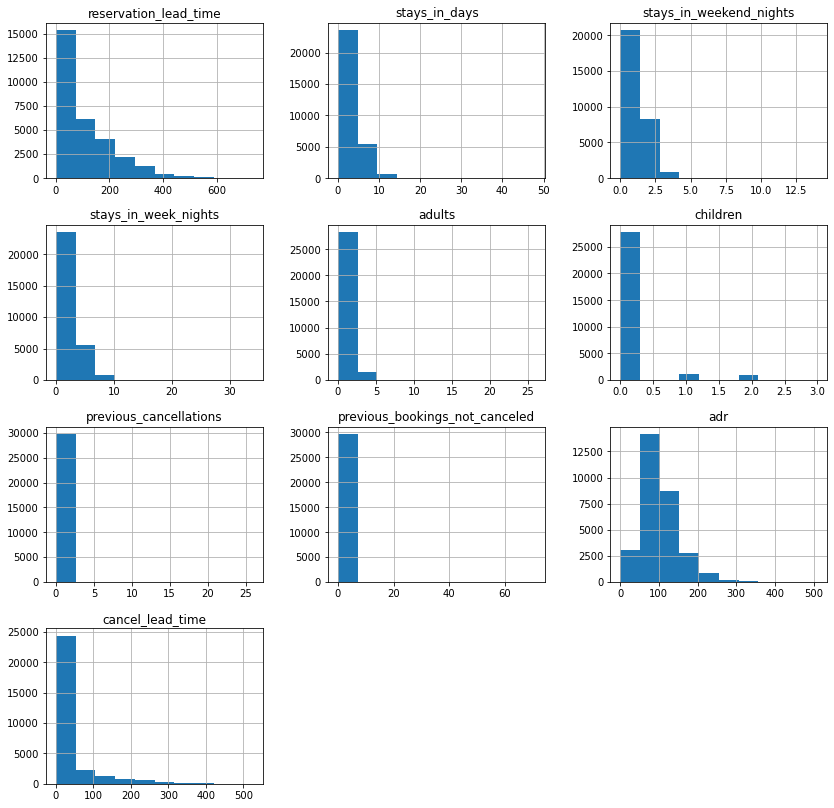

In [10]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.show()

### **Univariate analysis for categorical variables**

In [11]:
for i in cat_cols:
    print(df[i].value_counts(normalize = True))
    
    print('*' * 40)

City Hotel      0.665985
Resort Hotel    0.334015
Name: hotel, dtype: float64
****************************************
August       0.117101
July         0.103800
May          0.099745
October      0.094083
June         0.093446
April        0.089694
September    0.088153
March        0.082993
February     0.067547
December     0.059103
November     0.055150
January      0.049186
Name: arrival_date_month, dtype: float64
****************************************
5    0.165315
6    0.164310
2    0.152416
7    0.146653
4    0.137070
1    0.118810
3    0.115426
Name: Day_of_week, dtype: float64
****************************************
PRT      0.406118
Other    0.220867
GBR      0.100784
FRA      0.087449
ESP      0.072908
DEU      0.060511
ITA      0.032601
USA      0.018763
Name: Nationality, dtype: float64
****************************************
Online TA        0.469577
Offline TA/TO    0.204282
Groups           0.167326
Direct           0.105676
Corporate        0.044629
Complementary

**Observations:**


- **40% of the people who book are from Portugal**.
- **46% of the reservations are made through Online TA**. 
- **Type A room is the most booked**.
- **The booking cancelation rate is 36%.**

### **Bivariate and Multivariate analysis**

**Let's check how does booking canelation is related with other categorical variables**

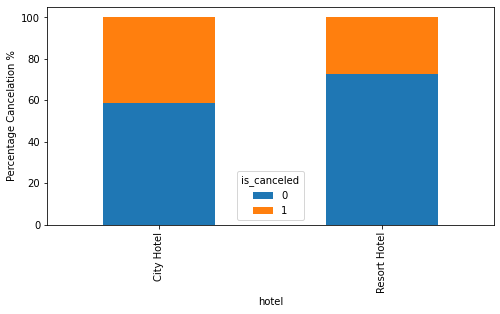

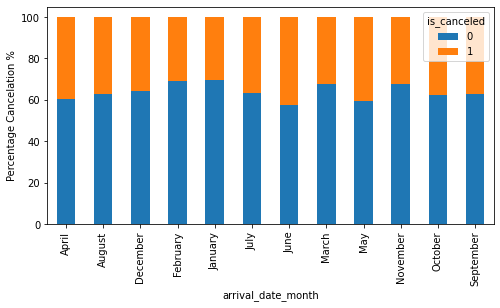

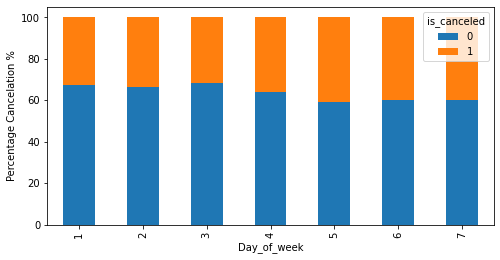

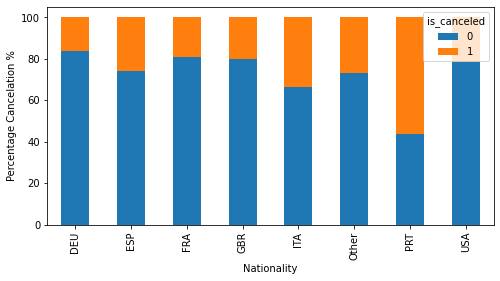

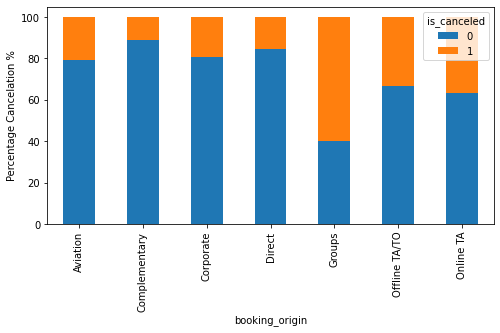

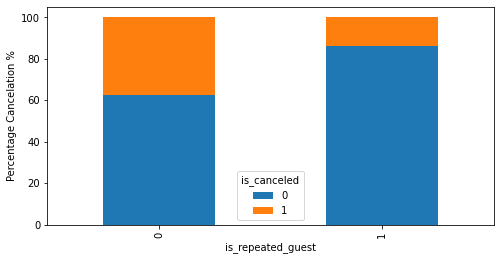

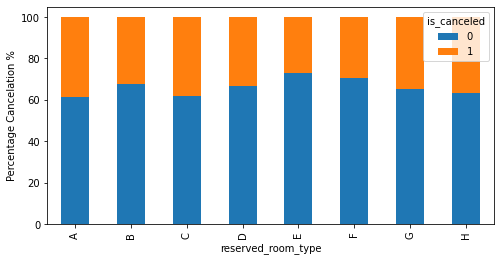

In [12]:
for i in cat_cols:
    if i != 'is_canceled':
        (pd.crosstab(df[i], df['is_canceled'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Cancelation %')

**Observations:**
    
- Reservations made for Portuguese people are more propensity to be canceled.
- Reservations made through the 'Groups' booking origin are more propensity to be canceled.
- New clients are more likely to cancel a booking.

**Let's check the relationship between booking cancelations and Numerical variables**

In [13]:
# The mean of numerical variables grouped by is_canceled
df.groupby(['is_canceled'])[num_cols].mean()

,reservation_lead_time,stays_in_days,stays_in_weekend_nights,stays_in_week_nights,adults,children,previous_cancellations,previous_bookings_not_canceled,adr,cancel_lead_time
is_canceled,,,,,,,,,,
0,80.697495,3.384025,0.924625,2.459399,1.82801,0.099793,0.017745,0.207956,99.676874,0.000000
1,144.216650,3.492569,0.928148,2.564421,1.89204,0.102763,0.205343,0.026534,104.951049,85.481536


**Observations:**

- **90% of the cancellations are made by customers who have already canceled in the past**.

### **Let's check the relationship between different numerical variables**

<AxesSubplot:>

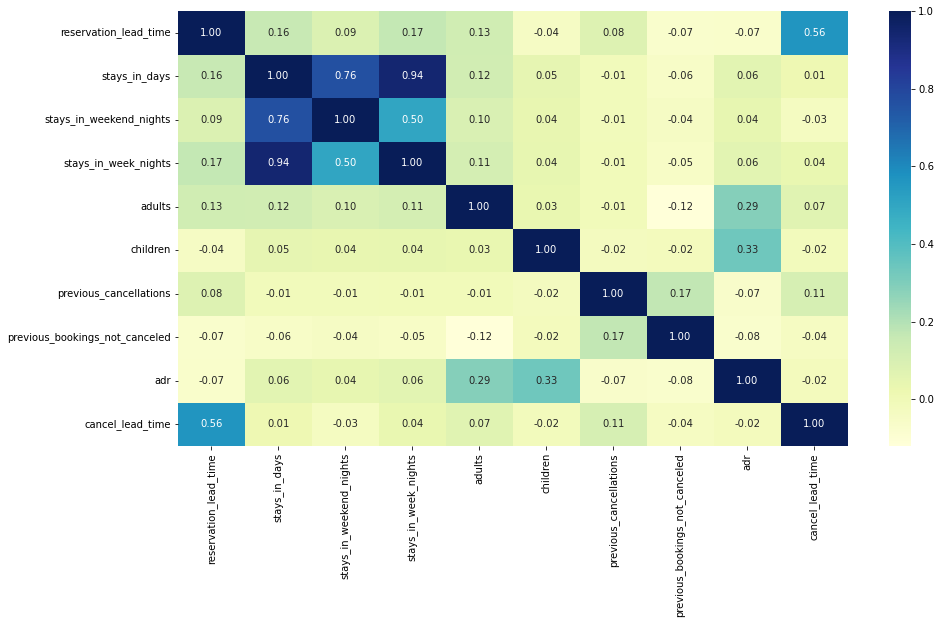

In [14]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observations:**

- Reservations made a long time in advance are more likely to be cancelled.
- Clients that have canceled in the past are more likely to calcel.

### <a id='link1'>Summary of EDA</a>

**Data Description:**

* There are **29846 observations and 19 columns** in the data.
* All the columns have 29846 non-null values, **there are no missing values**.
* As we have the day of the week and the month of the year in the data, we can **drop the Data column** as it would not add any value to our analysis.
* On the basis of the number of unique values in each column and the data description, we can **identify the continuous and categorical columns** in the data.


**Observations from EDA:**

- **90% of the cancellations are made by customers who have already canceled in the past**.
- Reservations made a long time in advance are more likely to be cancelled.
- Reservations made for Portuguese people are more propensity to be canceled.
- Reservations made through the 'Groups' booking origin are more propensity to be canceled.
- New clients are more likely to cancel a booking.
- **40% of the people who book are from Portugal**.
- **46% of the reservations are made through Online TA**. 
- Type A room is the most booked.
- **The booking cancelation rate is 36%.**
- **Average cancel lead time is 32 days**. 
- **On average, te reservation lead time is 3.4 months**.


**We have explored our data, let's build the model**

## **Model Building - Approach**

1. Prepare the data for modeling.
2. Partition the data into train and test sets.
3. Build the model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

###  **Preparing data for modeling**

**Creating dummy variables for categorical Variables**

In [15]:
df.keys()

Index(['hotel', 'reservation_lead_time', 'arrival_date_month', 'Day_of_week',
       'stays_in_days', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'Nationality', 'booking_origin',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'adr',
       'is_canceled', 'cancel_lead_time'],
      dtype='object')

In [16]:
# Creating the list of columns for which we need to create the dummy variables

to_get_dummies_for = ['hotel', 'arrival_date_month', 'Day_of_week',
       'Nationality', 'booking_origin',
       'is_repeated_guest', 'reserved_room_type']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      


**Separating the independent variables (X) and the dependent variable (Y)**

In [17]:
# Separating the target variable and other variables
Y = df.is_canceled
X = df.drop(columns = ['is_canceled'])

### **Scaling the data**

The standard score of sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [18]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Splitting the data into 70% train and 30% test sets**

In [19]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a reservation will be canceled when the customer doesn't cancel
2. Predicting a reservation will not be calceled when the customer actually cancel

**Which case is more important?**

* **Predicting a reservation will not be calceled when the customer actually cancel**

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The hotel would want the Recall to be maximized**

Now, let's develop a function that computes and displays the classification report and confusion matrix, thereby eliminating the need to duplicate the code for every model.

In [20]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

### **Building the model**

We will be building 2 different models:
- **Logistic Regression**
- **K-Nearest Neighbors (K-NN)**

### **Logistic Regression**

- Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

In [21]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

**Checking the model performance**

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13215
           1       1.00      0.89      0.94      7677

    accuracy                           0.96     20892
   macro avg       0.97      0.95      0.96     20892
weighted avg       0.96      0.96      0.96     20892



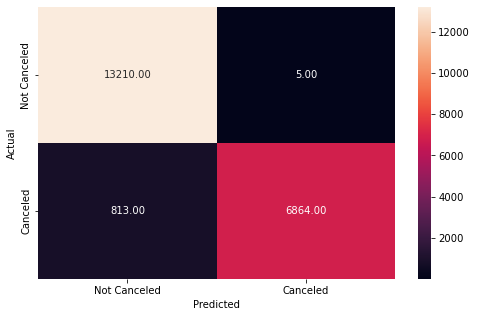

In [22]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

**Reading the confusion matrix (clockwise from top left):**

* True Negative (Actual = 0, Predicted = 0): Model predicts that a reservation will not be cancelled and the reservation is not cancelled

* False Positive (Actual = 0, Predicted = 1): Model predicts that a reservation will be cancelled but the reservation is not cancelled

* True Positive (Actual = 1, Predicted = 1): Model predicts that a reservation will be cancelled and the reservation is cancelled

* False Negative (Actual = 1, Predicted = 0): Model predicts that a reservation will not be cancelled but the reservation is cancelled

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5664
           1       1.00      0.89      0.94      3290

    accuracy                           0.96      8954
   macro avg       0.97      0.94      0.95      8954
weighted avg       0.96      0.96      0.96      8954



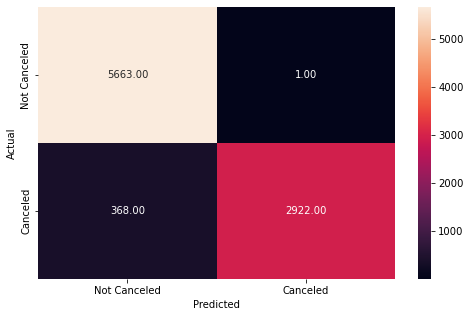

In [23]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observations:**

- **We are getting an accuracy of about 96%** on the train and the test datasets.

**Let's check the coefficients and find which variables are leading to cancelations and which can help to reduce the cancelations.**

In [24]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
cancel_lead_time,31.114944
Nationality_PRT,1.028622
previous_cancellations,0.351237
Nationality_Other,0.318231
Nationality_ESP,0.206127
Nationality_ITA,0.174996
Nationality_FRA,0.112591
arrival_date_month_May,0.102821
Nationality_GBR,0.100224
Nationality_USA,0.097132


**Observations:**


**Features which positively affect on the cancelation rate are:**
- cancel_lead_time	
- Nationality_PRT	
- previous_cancellations	
- Nationality_Other	
- Nationality_ESP	
- Nationality_ITA	
- Nationality_FRA	
- arrival_date_month_May	
- Nationality_GBR	

**Features which negatively affect on the cancelation rate are:**

- hotel_Resort Hotel
- reservation_lead_time
- is_repeated_guest_1
- Day_of_week_3

In [25]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
cancel_lead_time,3.258732e+13
Nationality_PRT,2.797209e+00
previous_cancellations,1.420824e+00
Nationality_Other,1.374694e+00
Nationality_ESP,1.228910e+00
Nationality_ITA,1.191242e+00
Nationality_FRA,1.119174e+00
arrival_date_month_May,1.108293e+00
Nationality_GBR,1.105418e+00
Nationality_USA,1.102006e+00


**Observations:**

- The odds of a Portuguese custumer to cancel a booking are **2.8 times**.
- The odds of a cancelation came from a custumer that have canceled in the past are **1.4**.

**The Precision-Recall Curve for Logistic Regression**

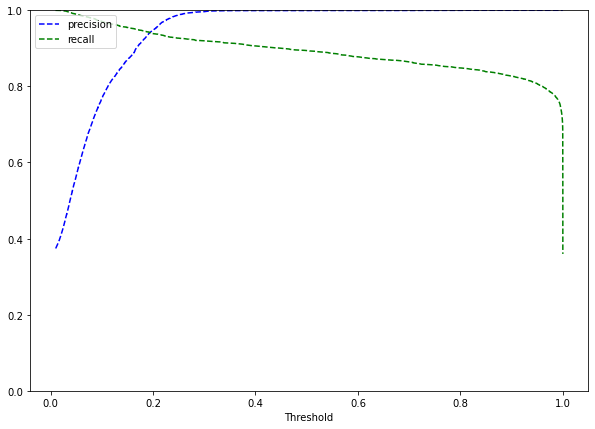

In [26]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**
- We can see that the precision and the recall are balanced for a threshold of about **0.19**.

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     13215
           1       0.94      0.94      0.94      7677

    accuracy                           0.96     20892
   macro avg       0.95      0.95      0.95     20892
weighted avg       0.96      0.96      0.96     20892



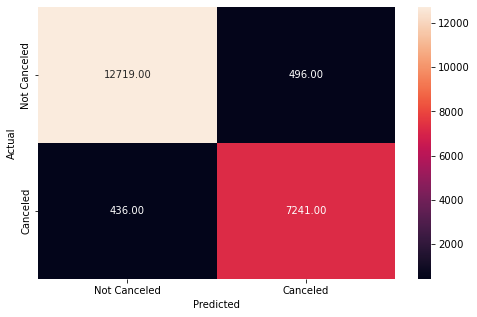

In [27]:
optimal_threshold1 = 0.19

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observations:**

- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5664
           1       0.94      0.94      0.94      3290

    accuracy                           0.95      8954
   macro avg       0.95      0.95      0.95      8954
weighted avg       0.95      0.95      0.95      8954



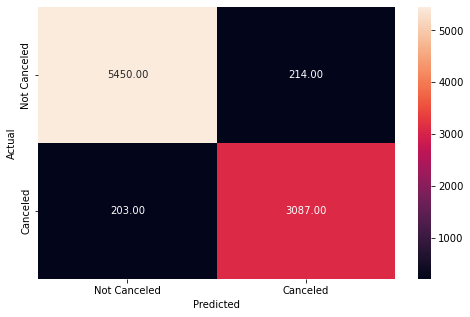

In [28]:
optimal_threshold1 = 0.19

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**


- The average recall and precision for the model are good but let's see if we can get even better performance using other algorithms. 
- The model have a **similar performance on the test and the train dataset**. Then, the model has generalized well.
- The model have a decent average recall. A recall of ~0.95 suggests that there is a 5% (1 - 0.95) chance that the model will predict that a customer is going to cancel even though he/she would not, and the hotel would waste time on these reservation who are not at risk of cancelation.}
- This seems like a high-performing model that the hotel can use to control the cancelation rate. There is about an **94% chance** that the model will detect custumers who are likely to cancel their reservation, and the company can take the appropriate action.

### **K-Nearest Neighbors (K-NN)**

- Select K
- Calculate distance (Euclidean, Manhattan, etc.)
- Find the K closest neighbors
- Take majority vote for labels

**before building the model, identify the value of K to be used in K-NN.  performimg the following steps for the same.**

- For every value of K (from 1 to 15), split the training set into a new train and validation sets (30 times)
- Scale the training data and the validation data
- Take the average of the error on these training and the validation sets for each value of K
- Plot the average train vs validation error for all Ks 
- Choose the optimal K from the plot where the two errors are comparable

In [29]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.20)
    
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [0.0006023255350126451, 0.2118529153705033],
 2: [0.10906479985639919, 0.19868389566882028],
 3: [0.108641975308642, 0.20993858179787825],
 4: [0.1411595763776701, 0.20465821169338752],
 5: [0.1397634575879056, 0.21188482093004707],
 6: [0.15724286483575659, 0.20885379277339078],
 7: [0.15597239673707092, 0.21020180266411417],
 8: [0.16838987614431886, 0.20921273031825796],
 9: [0.16576517281956166, 0.2107282443965861],
 10: [0.17664492710265461, 0.20909308446996883],
 11: [0.17295319013143462, 0.2119247028794768],
 12: [0.18244081453559108, 0.20922868309802983],
 13: [0.17905223478729132, 0.21126266251894393],
 14: [0.18700412852270684, 0.21273829464784239]}

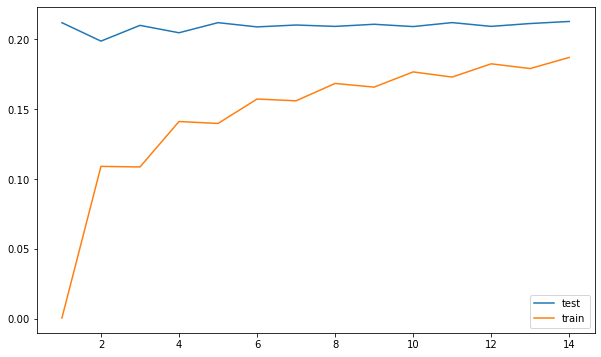

In [30]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations:**

- We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to 3. But the training error keeps increasing with increasing K.
- This implies that we would get a lower train and test error if we choose K = 3. Also, if we choose a higher value of K, the model would get biased due to the imbalance in the dataset.
- So, let's fit the K-NN model with **K=3** on the entire training set.

In [31]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 3)

In [32]:
# Fitting data to the K-NN model

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     13215
           1       0.89      0.81      0.85      7677

    accuracy                           0.89     20892
   macro avg       0.89      0.88      0.88     20892
weighted avg       0.89      0.89      0.89     20892



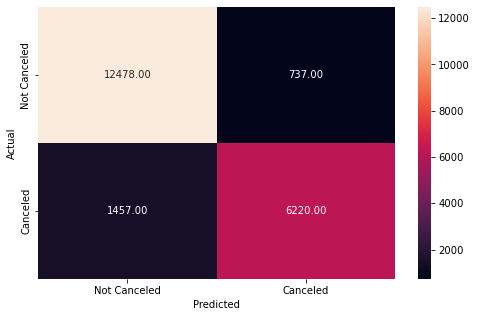

In [33]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(x_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      5664
           1       0.75      0.67      0.71      3290

    accuracy                           0.80      8954
   macro avg       0.79      0.77      0.78      8954
weighted avg       0.80      0.80      0.80      8954



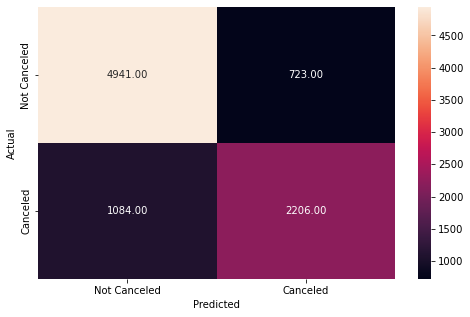

In [34]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(x_test)

metrics_score(y_test, y_pred_test_knn)

**Observation:**
- The model have a better performance on the train than on the test data but the **recall for class 1 is not very good**. Let's see if we can improve on that.

- This appears to be a high-performing model that the hotel can use to cotrol the cancelation rate. There is about an **83% chance** that the model will detect custumers who are likely to cancel a reservation, and the hotel can take action.

### **Using GridSearchCV for Hyperparameter tuning of the model**

- **n_neighbors**

    - Number of neighbors.


- **weights={'uniform', 'distance'}**

    - uniform : uniform weights.
    - distance : weight points by the inverse of their distance.


- **p**
    - When p = 1, Manhattan_distance (L1), and Euclidean_distance (L2) is  p = 2.

In [35]:
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(x_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


In [36]:
# Fit the best estimator on the training data
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13215
           1       1.00      1.00      1.00      7677

    accuracy                           1.00     20892
   macro avg       1.00      1.00      1.00     20892
weighted avg       1.00      1.00      1.00     20892



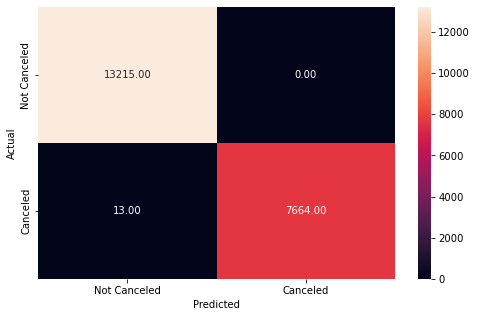

In [37]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      5664
           1       0.80      0.69      0.74      3290

    accuracy                           0.82      8954
   macro avg       0.82      0.80      0.80      8954
weighted avg       0.82      0.82      0.82      8954



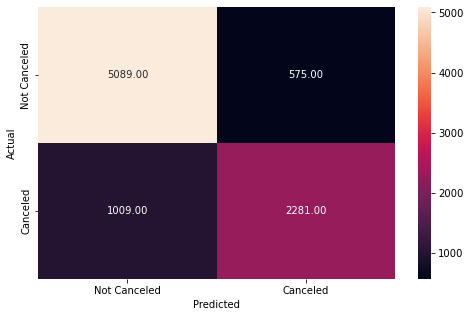

In [38]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_knn_estimator)

**Observations:**


- The model seems to be overfitting and **Test recall and precision have increased very little** by tuning the K-NN classifier.

- This model seems to be overfitting.

### **Linear Discriminant Analysis**

- Maximizing the distance between the means of two classes.
- Minimizing the variation between each category.

In [39]:
# Fitting the LDA model
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

**Checking the performance of the model**

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     13215
           1       0.93      0.61      0.73      7677

    accuracy                           0.84     20892
   macro avg       0.87      0.79      0.81     20892
weighted avg       0.85      0.84      0.83     20892



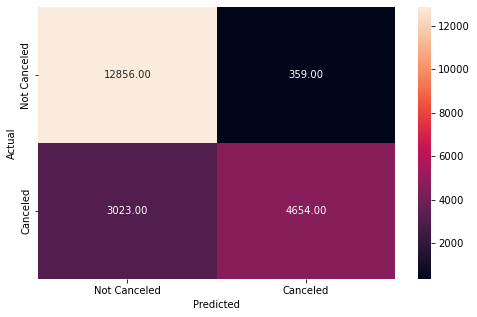

In [41]:
# Checking model performance of LDA
y_pred_train_lda = lda.predict(x_train)

metrics_score(y_train, y_pred_train_lda)

**Observations:**

- The model is performing well in terms of accuracy.
- The recall for class 1 is low, this implies that this model will not perform well in differentiating the customers who have a high chance of canceling their reservation. 

We have built the LDA model. **Let's check the coefficients.**

In [49]:
# Creating the list of column names
cols = X.columns

# Saving coefficients of LDA model
coef_lda = lda.coef_

# Printing the cofficients of LDA
pd.DataFrame(coef_lda, columns = cols).T.sort_values(by = 0, ascending = False)

,0
cancel_lead_time,1.991860
Nationality_PRT,1.209276
booking_origin_Online TA,0.671172
booking_origin_Groups,0.460638
booking_origin_Offline TA/TO,0.284936
adr,0.259916
Nationality_Other,0.241924
Nationality_ESP,0.199334
Nationality_ITA,0.175519
previous_cancellations,0.174723


**Some features which positively affect the cancelation rate are:**
- cancel_lead_time	
- Nationality_PRT	
- booking_origin_Online TA	
- booking_origin_Groups	
- booking_origin_Offline TA/TO	
- adr	

**Some features which negatively affect the cancelation rate are:**
- arrival_date_month_August	
- arrival_date_month_July	
- is_repeated_guest_1	
- reservation_lead_time	
- hotel_Resort Hotel

### **Precision-Recall Curve for LDA**

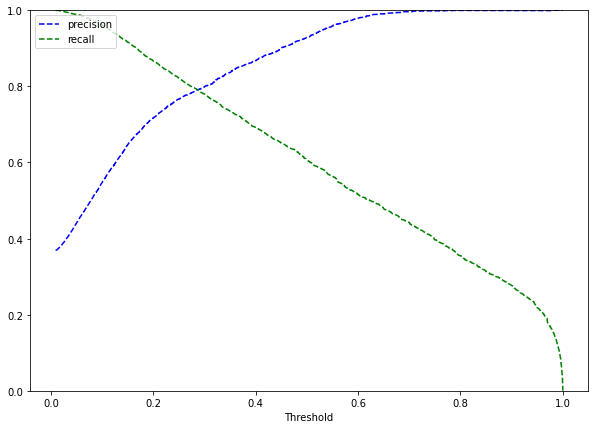

In [43]:
y_scores_lda = lda.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**

- The recall are balanced for a threshold of about ~0.28.

**Let's check the model performance at this threshold**

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     13215
           1       0.79      0.80      0.79      7677

    accuracy                           0.85     20892
   macro avg       0.83      0.84      0.83     20892
weighted avg       0.85      0.85      0.85     20892



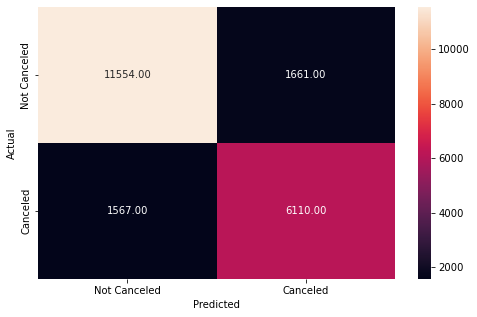

In [44]:
optimal_threshold1 = 0.28

y_pred_train_lda = lda.predict_proba(x_train)

metrics_score(y_train, y_pred_train_lda[:,1] > optimal_threshold1)

**Observations:**

- The precision has increased and **the recall (class and metric of interest) for class 1 has increased to 0.80**.
- **The model is able to identify the majority of reservations that are at risk of cancelation,** and would hence be a more useful model than the previous iteration with the default threshold.

Let's check the model performance on the test data

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5664
           1       0.79      0.79      0.79      3290

    accuracy                           0.85      8954
   macro avg       0.83      0.83      0.83      8954
weighted avg       0.85      0.85      0.85      8954



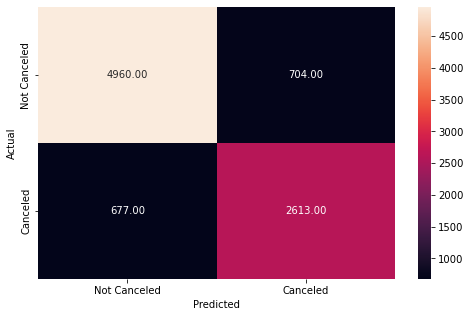

In [50]:
# Checking performance on the test data
optimal_threshold1 = 0.28

y_pred_test_lda = lda.predict_proba(x_test)

metrics_score(y_test, y_pred_test_lda[:,1] > optimal_threshold1)

**Observations:**

- **The average recall and the precision for the model are good**, let's see if we can get a better performance using other algorithms. 
- The model have a **similar performance on the test and the train dataset**. Then, the model has generalized well.

### **Quadratic Discriminant Analysis**

In [46]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()

qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13215
           1       1.00      0.95      0.97      7677

    accuracy                           0.98     20892
   macro avg       0.98      0.98      0.98     20892
weighted avg       0.98      0.98      0.98     20892



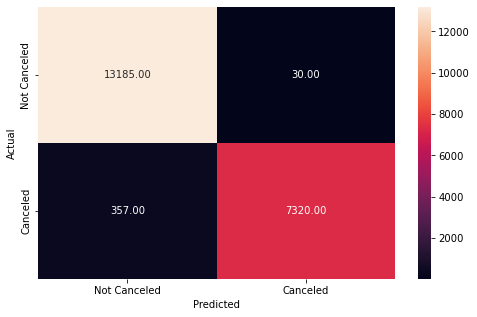

In [47]:
# Checking model performance on the training data
y_pred_train_qda = qda.predict(x_train)

metrics_score(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5664
           1       1.00      0.95      0.97      3290

    accuracy                           0.98      8954
   macro avg       0.98      0.97      0.98      8954
weighted avg       0.98      0.98      0.98      8954



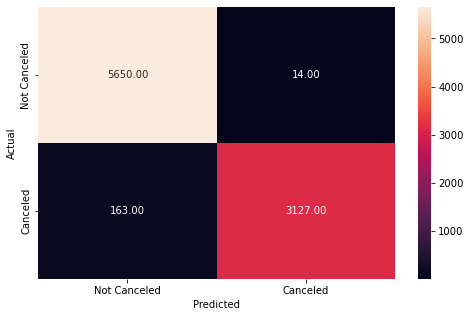

In [48]:
# Checking performance of the model on the test data
y_pred_test_qda = qda.predict(x_test)

metrics_score(y_test, y_pred_test_qda)

**Observations:**

- The model have a **similar performance on the test and the train dataset**. Then, the model has generalized well.
- The model have a decent average recall. A recall of ~0.97 suggests that there is a 3% (1 - 0.97) chance that the model will predict that a customer is going to cancel even though he/she would not, and the hotel would waste time on these reservation who are not at risk of cancelation.
- This seems like a high-performing model that the hotel can use to control the cancelation rate. There is about an **95% chance** that the model will detect custumers who are likely to cancel their reservation, and the company can take the appropriate action.

In [56]:
print(qda.priors_)
print(qda.means_)

[0.63253877 0.36746123]
[[-2.20293219e-01 -1.95555617e-02 -2.27283793e-03 -2.50210613e-02
  -4.44542433e-02 -1.10362043e-02 -8.01311660e-02  4.45582500e-02
  -4.31395735e-02 -4.55527545e-01  9.94734783e-02 -1.61187799e-02
  -1.62094088e-03  3.20727037e-02  2.55472240e-02  3.29718244e-03
  -2.70111933e-02  2.55789339e-02 -2.80643096e-02  1.66397548e-02
  -5.97791873e-04  2.41934676e-03  2.14380603e-02  2.88082476e-02
   3.55575305e-04 -2.15203647e-02 -2.74373788e-02 -2.13943214e-02
   4.58498215e-02  8.95663573e-02  8.12258953e-02  2.20806204e-03
   9.14340915e-02 -2.53290495e-01  2.51224789e-02  3.31162309e-02
   5.28546054e-02  1.14334666e-01 -1.63643746e-01  2.29756580e-02
   5.54001020e-03  6.96147408e-02  6.95488164e-03 -1.31473778e-03
   2.67157684e-02  3.25118649e-02  2.01218039e-02  4.20004680e-03
  -5.01946183e-03]
 [ 3.76831536e-01  3.05031258e-02  5.30454964e-03  3.81108582e-02
   7.66928160e-02  6.48074303e-03  1.45518809e-01 -7.48522541e-02
   6.70950005e-02  7.80561887e-01

### **Conclusions:**

- We have tried multiple models and were **able to identify some important factors involved with booking cancelations**.
- The final model, **a Logistic Regression classifier**, **gives the highest recall on the training and the testing datasets.** It may be possible to further try and tune the model, and the Hotel can use this model to predict whether a reservation is at risk of cancelation or not.